In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [10]:
full_zips_df = pd.read_csv("full_zip_codes.csv", index_col="ZIPCODE")
short_zips_list_df = pd.read_csv("Preliminary_zip_route_weight.csv", index_col="Zipcode")

In [11]:
full_zips_df.head()

,TOTAL_POPULATION,TOTAL_HOUSEHOLDS,MEDIAN_HOUSEHOLD_INCOME,MEAN_HOUSEHOLD_INCOME,TOTAL_HOUSING_UNITS
ZIPCODE,,,,,
78701,7875,4855,112201,173289,6576
78702,22876,8937,54053,73919,9839
78703,20788,9723,98553,166396,11047
78704,47158,23213,66262,91223,25815
78705,33075,8370,15309,41357,10336


In [12]:
short_zips_list_df.head()


,Route,Weight
Zipcode,,
78721,PAF73,581400
78724,PH21,583480
78741,PT31,478260
78723,PAF52,581400
78745,PAT54,626580


In [15]:
# merge datasets
merged_zips = full_zips_df.merge(short_zips_list_df, how="inner", left_index=True, right_index=True)
merged_zips.head(10)

,TOTAL_POPULATION,TOTAL_HOUSEHOLDS,MEDIAN_HOUSEHOLD_INCOME,MEAN_HOUSEHOLD_INCOME,TOTAL_HOUSING_UNITS,Route,Weight
78701,7875,4855,112201,173289,6576,PF32,458460
78703,20788,9723,98553,166396,11047,PAF04,651640
78721,12447,4197,41611,52873,4632,PAF73,581400
78723,33170,12518,49606,71897,13777,PAF52,581400
78724,24833,6360,45158,55252,6754,PH21,583480
78739,20191,6367,147736,175189,6460,PAM06,1092240
78741,52307,20758,39049,49856,23380,PT31,478260
78744,48432,14345,47073,56407,15236,PAM71,1201800
78745,62220,25857,60567,72944,27367,PAT54,626580
78745,62220,25857,60567,72944,27367,PAT70,609900


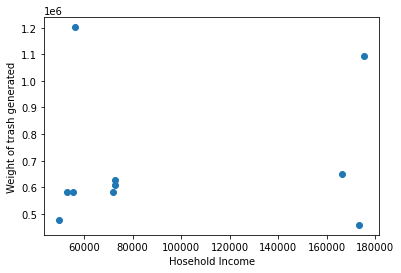

In [17]:
plt.scatter(merged_zips.MEAN, merged_zips.Weight)
plt.xlabel('Hosehold Income')
plt.ylabel('Weight of trash generated')
plt.show()

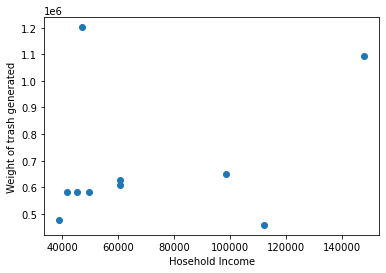

In [18]:
plt.scatter(merged_zips.MEDIAN_HOUSEHOLD_INCOME, merged_zips.Weight)
plt.xlabel('Hosehold Income')
plt.ylabel('Weight of trash generated')
plt.show()

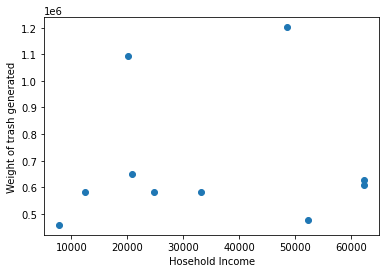

In [19]:
plt.scatter(merged_zips.TOTAL_POPULATION, merged_zips.Weight)
plt.xlabel('Hosehold Income')
plt.ylabel('Weight of trash generated')
plt.show()

In [20]:
X = merged_zips.TOTAL_POPULATION.values.reshape(-1, 1)

In [21]:
X.shape

(10, 1)

In [22]:
y = merged_zips.Weight

In [25]:
model = LinearRegression()

In [26]:
model.fit(X,y)

LinearRegression()

In [27]:
y_pred = model.predict(X)
print(y_pred.shape)

(10,)


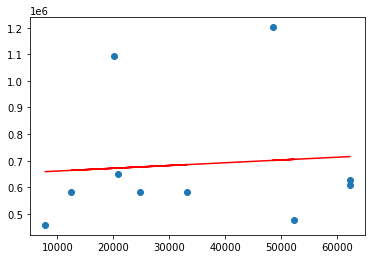

In [28]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()